**1. Importación de Librerías**

In [11]:
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuración de gráficos
plt.style.use('ggplot')


**2. Cargar y Preparar los Datos de los Modelos**

In [12]:
# Cargar los datos de los cuatro modelos
gpt_35_results = pd.read_csv("gpt-3.5-turbo_results.csv")
gpt_4_mini_results = pd.read_csv("gpt-4o-mini_results.csv")
llama_70b_results = pd.read_csv("llama-3.1-70b-versatile_results.csv")
llama_8b_results = pd.read_csv("llama-3.1-8b-instant_results.csv")
galois_results = pd.read_csv("Chat_GPT_label.csv")

# Mostrar las primeras filas para verificar que se han cargado correctamente
print(gpt_35_results.head())
print(gpt_4_mini_results.head())
print(llama_70b_results.head())
print(llama_8b_results.head())
print(galois_results.head())


                                               Query  Database  \
0  SELECT name FROM airports WHERE elevation BETW...  flight_4   
1  SELECT area FROM state WHERE state_name = "new...       geo   
2  SELECT name FROM city WHERE Population BETWEEN...   world_1   
3  SELECT city_name FROM city WHERE population > ...       geo   
4  SELECT COUNT ( capital ) FROM state WHERE stat...       geo   

                                        Query Answer  \
0  [('Madang Airport',), ('Wewak International Ai...   
1                                      [(121600.0,)]   
2  [('Qandahar',), ('Herat',), ('Amsterdam',), ('...   
3  [('birmingham',), ('mobile',), ('montgomery',)...   
4                                             [(1,)]   

                 Translated Query (Natural Language)  \
0  Which airports are located at an elevation bet...   
1  What is the area of the state with the name "N...   
2  Which cities have a population between 160,000...   
3  Which cities have a population greater 

**3. Calcular Métricas Promedio por Modelo**

In [13]:
# Función para calcular métricas promedio de un DataFrame
def calculate_avg_metrics(df):
    precision_avg = df['Precision'].mean()
    recall_avg = df['Recall'].mean()
    exact_match_avg = df['Exact Match'].mean()
    fuzzy_match_avg = df['Fuzzy Match'].mean()
    return precision_avg, recall_avg, exact_match_avg, fuzzy_match_avg

# Calcular métricas promedio para cada modelo
gpt_35_avg = calculate_avg_metrics(gpt_35_results)
gpt_4_mini_avg = calculate_avg_metrics(gpt_4_mini_results)
llama_70b_avg = calculate_avg_metrics(llama_70b_results)
llama_8b_avg = calculate_avg_metrics(llama_8b_results)

# Crear un DataFrame para comparar los resultados
model_performance = pd.DataFrame({
    'Model': ['gpt-3.5-turbo', 'gpt-4o-mini', 'llama-70b', 'llama-8b'],
    'Precision': [gpt_35_avg[0], gpt_4_mini_avg[0], llama_70b_avg[0], llama_8b_avg[0]],
    'Recall': [gpt_35_avg[1], gpt_4_mini_avg[1], llama_70b_avg[1], llama_8b_avg[1]],
    'Exact Match': [gpt_35_avg[2], gpt_4_mini_avg[2], llama_70b_avg[2], llama_8b_avg[2]],
    'Fuzzy Match': [gpt_35_avg[3], gpt_4_mini_avg[3], llama_70b_avg[3], llama_8b_avg[3]]
})

# Mostrar la tabla comparativa
model_performance


,Model,Precision,Recall,Exact Match,Fuzzy Match
0,gpt-3.5-turbo,0.918367,0.755640,0.632653,77.224490
1,gpt-4o-mini,0.880000,0.825984,0.720000,82.640000
2,llama-70b,0.959184,0.850346,0.734694,86.755102
3,llama-8b,0.741018,0.622758,0.466667,62.688889


**4. Seleccionar el Mejor Modelo Basado en Precisión**

In [14]:
# Seleccionar el modelo con mayor precisión
best_model = model_performance.loc[model_performance['Precision'].idxmax()]
best_model_name = best_model['Model']

# Mostrar el mejor modelo
print(f"El mejor modelo basado en Precisión es: {best_model_name}")


El mejor modelo basado en Precisión es: llama-70b


**5. Comparación Gráfica del Mejor Modelo vs Galois**

In [15]:
# Función para calcular los promedios de las métricas en Galois
def calculate_avg_metrics(df):
    """
    Calcula los promedios de las métricas relevantes del DataFrame de Galois, ignorando valores no numéricos.
    
    Args:
        df (pd.DataFrame): DataFrame con las métricas de Galois.
        
    Returns:
        list: Promedios de precisión, recall, EM y fuzzy EM.
    """
    # Convertir las columnas relevantes a numéricas (forzar a NaN los valores no numéricos)
    df['Galois Precision'] = pd.to_numeric(df['Galois Precision'], errors='coerce')
    df['Galois Recall'] = pd.to_numeric(df['Galois Recall'], errors='coerce')
    df['Galois EM'] = pd.to_numeric(df['Galois EM'], errors='coerce')
    df['Galois Fuzzy EM'] = pd.to_numeric(df['Galois Fuzzy EM'], errors='coerce')

    # Calcular los promedios ignorando valores NaN
    precision_avg = df['Galois Precision'].dropna().mean()
    recall_avg = df['Galois Recall'].dropna().mean()
    exact_match_avg = df['Galois EM'].dropna().mean()
    fuzzy_match_avg = df['Galois Fuzzy EM'].dropna().mean()
    
    return precision_avg, recall_avg, exact_match_avg, fuzzy_match_avg


# Calcular las métricas promedio para Galois
galois_avg = calculate_avg_metrics(galois_results)

# Crear un DataFrame para la comparación entre el mejor modelo y Galois
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'Exact Match', 'Fuzzy Match'],
    best_model_name: [
        best_model['Precision'], 
        best_model['Recall'], 
        best_model['Exact Match'], 
        best_model['Fuzzy Match']
    ],
    'Galois': galois_avg  # Aquí usamos directamente la lista con los promedios
})

# Mostrar la tabla comparativa entre el mejor modelo y Galois
comparison_df


,Metric,llama-70b,Galois
0,Precision,0.959184,0.490174
1,Recall,0.850346,0.288015
2,Exact Match,0.734694,0.083333
3,Fuzzy Match,86.755102,0.500000


 **6. Gráficos Comparativos**

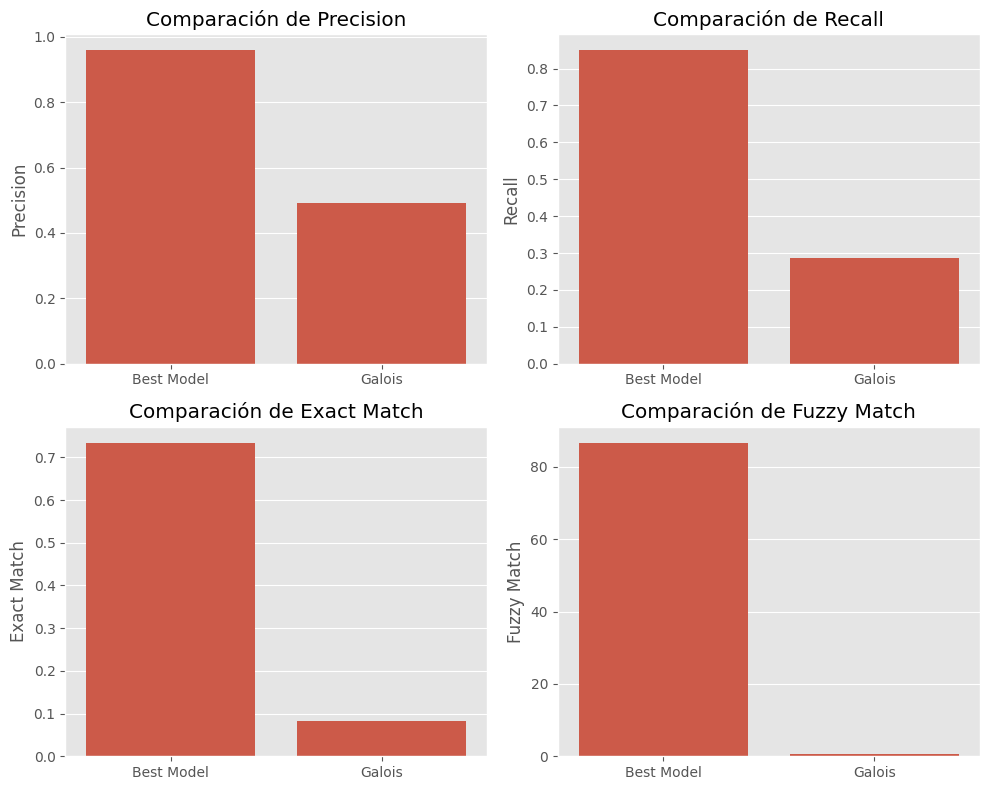

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con una cuadrícula 2x2 para los gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Definir las métricas
metrics = comparison_df['Metric']
best_model_scores = comparison_df[best_model_name]
galois_scores = comparison_df['Galois']

# Lista de métricas y los ejes correspondientes
metric_names = ['Precision', 'Recall', 'Exact Match', 'Fuzzy Match']
axes_flat = axes.flatten()

# Crear gráficos de barras para cada métrica
for i, metric in enumerate(metric_names):
    sns.barplot(
        x=['Best Model', 'Galois'], 
        y=[best_model_scores[i], galois_scores[i]], 
        ax=axes_flat[i]
    )
    axes_flat[i].set_title(f'Comparación de {metric}')
    axes_flat[i].set_ylabel(metric)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


**7. Conclusiones y Observaciones**

In [17]:
# Comparar y extraer observaciones finales
if best_model['Precision'] > galois_avg[0]:
    print(f"El modelo {best_model_name} supera a Galois en precisión.")
else:
    print(f"Galois supera a {best_model_name} en precisión.")
    

El modelo llama-70b supera a Galois en precisión.


**8. Prueba T-Test para Comparar Precisión**

In [18]:
from scipy import stats

# Extraer las precisiones de los modelos
gpt_35_precision = gpt_35_results['Precision'].dropna()
gpt_4_mini_precision = gpt_4_mini_results['Precision'].dropna()
llama_70b_precision = llama_70b_results['Precision'].dropna()
llama_8b_precision = llama_8b_results['Precision'].dropna()
galois_precision = galois_results['Galois Precision'].dropna()

# Seleccionar la precisión del mejor modelo
if best_model_name == 'gpt-3.5-turbo':
    best_model_precision = gpt_35_precision
elif best_model_name == 'gpt-4o-mini':
    best_model_precision = gpt_4_mini_precision
elif best_model_name == 'llama-70b':
    best_model_precision = llama_70b_precision
else:
    best_model_precision = llama_8b_precision

# Realizar el t-test entre el mejor modelo y Galois
t_stat, p_value = stats.ttest_ind(best_model_precision, galois_precision)

# Mostrar los resultados del t-test
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print(f"Hay una diferencia estadísticamente significativa entre {best_model_name} y Galois en términos de precisión.")
else:
    print(f"No hay una diferencia estadísticamente significativa entre {best_model_name} y Galois en términos de precisión.")


T-Statistic: 5.872357975306232
P-Value: 2.104193176423247e-07
Hay una diferencia estadísticamente significativa entre llama-70b y Galois en términos de precisión.


**9. Visualización de la Distribución de la Precisión**

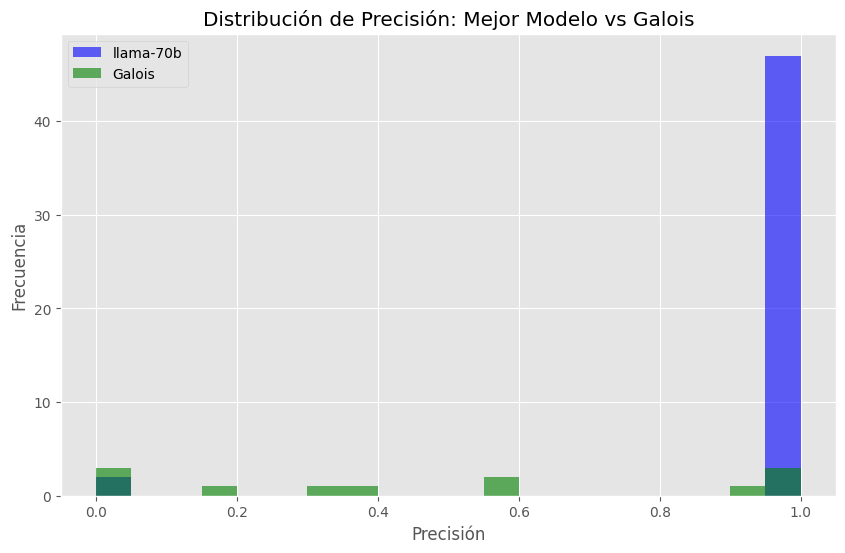

In [19]:
# Visualización de las distribuciones de precisión
plt.figure(figsize=(10, 6))
plt.hist(best_model_precision, bins=20, alpha=0.6, label=best_model_name, color='blue')
plt.hist(galois_precision, bins=20, alpha=0.6, label='Galois', color='green')
plt.title('Distribución de Precisión: Mejor Modelo vs Galois')
plt.xlabel('Precisión')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()
